In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import seaborn as sns

In [57]:
(train_data,train_labels),(test_data,test_labels)=cifar10.load_data()

In [58]:
train_data.shape

(50000, 32, 32, 3)

In [59]:
train_data[0].shape

(32, 32, 3)

In [60]:
train_labels.shape

(50000, 1)

In [61]:
train_labels.ravel()

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [62]:
np.unique(train_labels)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

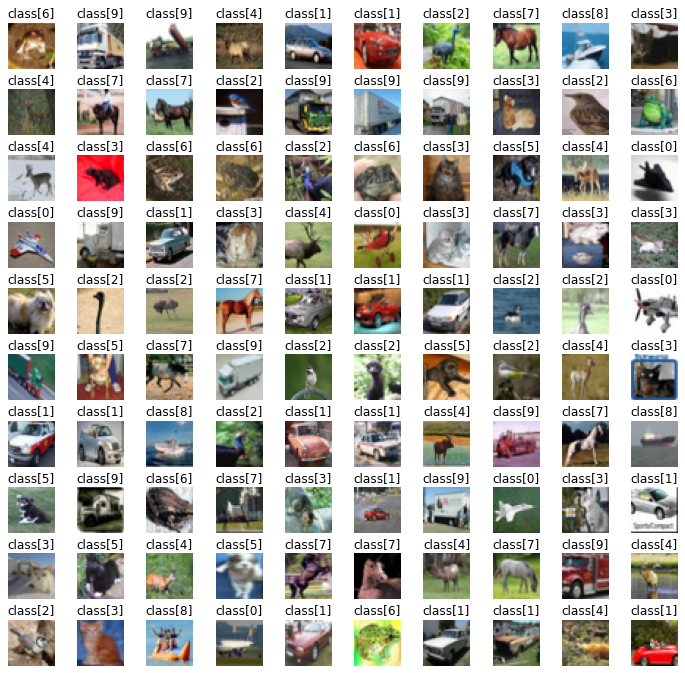

In [63]:
# Create a grid of 16 images along with their corresponding labels
L = 10
W = 10

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_data[i])
    axes[i].set_title('class{}'.format(train_labels[i]))
    axes[i].axis('off')
    

plt.subplots_adjust(wspace = 0.5)  

# CountPlot of no of data in each class

[Text(0.5, 1.0, 'Counts in Train_data')]

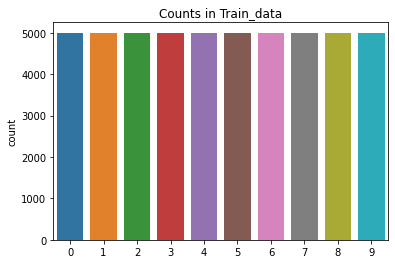

In [64]:
sns.countplot(train_labels.ravel()).set(title='Counts in Train_data')

[Text(0.5, 1.0, 'Counts in Test_data')]

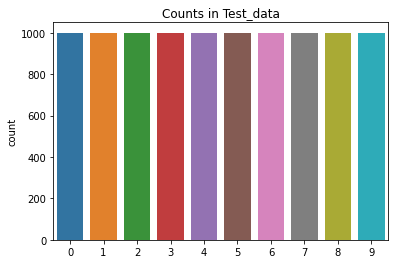

In [65]:
sns.countplot(test_labels.ravel()).set(title='Counts in Test_data')

# Data_preparation

In [66]:
train_data=train_data.reshape(50000,32*32*3)
train_data=train_data.astype('float')/255
test_data=test_data.reshape(10000,32*32*3)
test_data=test_data.astype('float')/255

In [67]:
from tensorflow.keras.utils import to_categorical

In [68]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [69]:
train_labels[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Model_prep

In [70]:
from tensorflow.keras import models,layers

In [71]:
model=models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(3072,)))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [72]:
from tensorflow.keras import optimizers

In [73]:

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy',
metrics=['accuracy'])

In [74]:
model.fit(train_data,train_labels,epochs=20,batch_size=128)

Epoch 1/20
391/391 [==============================] - 14s 33ms/step - loss: 2.1617 - accuracy: 0.1748
Epoch 2/20
391/391 [==============================] - 14s 35ms/step - loss: 1.9619 - accuracy: 0.2786
Epoch 3/20
391/391 [==============================] - 14s 36ms/step - loss: 1.8603 - accuracy: 0.3253
Epoch 4/20
391/391 [==============================] - 15s 37ms/step - loss: 1.7812 - accuracy: 0.3583
Epoch 5/20
391/391 [==============================] - 14s 36ms/step - loss: 1.7232 - accuracy: 0.3811
Epoch 6/20
391/391 [==============================] - 14s 36ms/step - loss: 1.6761 - accuracy: 0.4016
Epoch 7/20
391/391 [==============================] - 14s 36ms/step - loss: 1.6341 - accuracy: 0.4192
Epoch 8/20
391/391 [==============================] - 14s 37ms/step - loss: 1.5990 - accuracy: 0.4316
Epoch 9/20
391/391 [==============================] - 17s 44ms/step - loss: 1.5725 - accuracy: 0.4422
Epoch 10/20
391/391 [==============================] - 16s 41ms/step - loss: 1.540

In [75]:
model.evaluate(test_data,test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 1.5654 - accuracy: 0.4731


[1.5654364824295044, 0.4731000065803528]

# Try_CNN

In [36]:
train_data2=train_data.astype('float')/255
test_data2=test_data.astype('float')/255

In [30]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D

In [31]:
model2=models.Sequential()
model2.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(500,activation='relu'))
model2.add(Dense(10,activation='softmax'))


In [32]:

model2.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy',
metrics=['accuracy'])

In [34]:
model2.fit(train_data2,train_labels2,epochs=20,batch_size=512)

Epoch 1/20
98/98 [==============================] - 88s 898ms/step - loss: 1.0406 - accuracy: 0.6341
Epoch 2/20
98/98 [==============================] - 90s 915ms/step - loss: 0.9863 - accuracy: 0.6520
Epoch 3/20
98/98 [==============================] - 95s 969ms/step - loss: 0.9347 - accuracy: 0.6712
Epoch 4/20
98/98 [==============================] - 94s 959ms/step - loss: 0.8879 - accuracy: 0.6867
Epoch 5/20
98/98 [==============================] - 94s 958ms/step - loss: 0.8447 - accuracy: 0.7054
Epoch 6/20
98/98 [==============================] - 96s 977ms/step - loss: 0.8071 - accuracy: 0.7181
Epoch 7/20
98/98 [==============================] - 102s 1s/step - loss: 0.7702 - accuracy: 0.7305
Epoch 8/20
98/98 [==============================] - 103s 1s/step - loss: 0.7304 - accuracy: 0.7452
Epoch 9/20
98/98 [==============================] - 103s 1s/step - loss: 0.6973 - accuracy: 0.7565
Epoch 10/20
98/98 [==============================] - 104s 1s/step - loss: 0.6614 - accuracy: 0.76

In [35]:
model2.evaluate(test_data,test_labels)

313/313 [==============================] - 10s 32ms/step - loss: 0.9145 - accuracy: 0.7220


[0.9144794940948486, 0.722000002861023]